In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime, time
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from difflib import SequenceMatcher
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from statsmodels.regression.linear_model import OLSResults

In [2]:
df = pd.read_csv("between-patch.csv")
pd.set_option('display.max_columns', None)

In [3]:
df['FavoriteCount'] = df['FavoriteCount'].replace(np.nan, 0)
df['ClosedDate'] = df['ClosedDate'].replace(np.nan, 0)
df['AcceptedAnswerId'] = df['AcceptedAnswerId'].replace(np.nan, 0)

In [4]:
p = re.compile(r'<.*?>')

for ind, row in df.iterrows():
    title_count = p.sub('',  df.loc[ind, "Title"])
    description_count = p.sub('',  df.loc[ind, "Body"])
    df.loc[ind, "Words_in_Title"] = len(re.findall(r'\w+',title_count))
    df.loc[ind, "Words_in_Title_Description"] = len(re.findall(r'\w+',description_count))

In [5]:
for ind, row in df.iterrows():
    if(df.loc[ind,"AcceptedAnswerId"]):
        df.loc[ind, "Accepted_Ans"] = 1
    else:
        df.loc[ind, "Accepted_Ans"] = 0

In [6]:
pattern = "<"

for ind, row in df.iterrows():
    df.loc[ind,"Tags_Count"] = len(re.findall(pattern, df.loc[ind,"Tags"]))

In [9]:
for ind , row in df.iterrows():
    title = df.loc[ind,"Title"]
    tag = re.sub(r'[^\w]', ' ', df.loc[ind, "Tags"])
#     print(format((SequenceMatcher(None, title,tag).ratio()*100),".2f"),"%")
    df.loc[ind, "title_tag_ratio"] = math.ceil(SequenceMatcher(None, title,tag).ratio()*100)

## Creation Days

In [10]:
for ind, row in df.iterrows():
    def date_diff_in_seconds(dt2, dt1):
        timedelta = dt2 - dt1
        return timedelta.days * 24 * 3600 + timedelta.seconds

    def dhms_from_seconds(seconds):
        minutes, seconds = divmod(seconds, 60)
        hours, minutes = divmod(minutes, 60)
        days, hours = divmod(hours, 24)
        return (days)
    
    #Dates
    creation_date = datetime.strptime(df.loc[ind,"CreationDate"], '%Y-%m-%dT%H:%M:%S')    

    #Data dump date
    dump_date = datetime.strptime('2020-12-21 01:00:00', '%Y-%m-%d %H:%M:%S')
    
    ##Difference
    creation_days = dhms_from_seconds(date_diff_in_seconds(dump_date, creation_date))
    
    ##New Colunmns
    df.loc[ind,"Creation_Days"] = 4527 - creation_days               

## Last Edit Days

In [11]:
for ind, row in df.iterrows():
    def date_diff_in_seconds(dt2, dt1):
        timedelta = dt2 - dt1
        return timedelta.days * 24 * 3600 + timedelta.seconds

    def dhms_from_seconds(seconds):
        minutes, seconds = divmod(seconds, 60)
        hours, minutes = divmod(minutes, 60)
        days, hours = divmod(hours, 24)
        return (days)        
        
    #Dates
    creation_date = datetime.strptime(df.loc[ind,"CreationDate"], '%Y-%m-%dT%H:%M:%S')    

    #Data dump date
    dump_date = datetime.strptime('2020-12-21 01:00:00', '%Y-%m-%d %H:%M:%S')
    
    ##Difference
    creation_days = dhms_from_seconds(date_diff_in_seconds(dump_date, creation_date))
    
    #Dates
    if(df.loc[ind,"LastEditDate"]==0):
        df.loc[ind,"Last_Edit_Days"] = creation_days
        
    else:
        last_edit_date = datetime.strptime(df.loc[ind,"LastEditDate"], '%Y-%m-%dT%H:%M:%S')
        ##Difference
        last_edit_days = dhms_from_seconds(date_diff_in_seconds(dump_date, last_edit_date))
        ##New Colunmns
        df.loc[ind,"Last_Edit_Days"] = 4527 - last_edit_days

## Last Activity Days

In [12]:
for ind, row in df.iterrows():
    def date_diff_in_seconds(dt2, dt1):
        timedelta = dt2 - dt1
        return timedelta.days * 24 * 3600 + timedelta.seconds

    def dhms_from_seconds(seconds):
        minutes, seconds = divmod(seconds, 60)
        hours, minutes = divmod(minutes, 60)
        days, hours = divmod(hours, 24)
        return (days)        
        
    #Dates
    creation_date = datetime.strptime(df.loc[ind,"CreationDate"], '%Y-%m-%dT%H:%M:%S')    

    #Data dump date
    dump_date = datetime.strptime('2020-12-21 01:00:00', '%Y-%m-%d %H:%M:%S')
    
    ##Difference
    creation_days = dhms_from_seconds(date_diff_in_seconds(dump_date, creation_date))
    
    #Dates
    if(df.loc[ind,"LastActivityDate"]==0):
        df.loc[ind,"Last_Activity_Days"] = creation_days
        
    else:
        last_activity_date = datetime.strptime(df.loc[ind,"LastActivityDate"], '%Y-%m-%dT%H:%M:%S')
        ##Difference
        last_activity_days = dhms_from_seconds(date_diff_in_seconds(dump_date, last_activity_date))
        ##New Colunmns
        df.loc[ind,"Last_Activity_Days"] = 4527 - last_activity_days

## Closed Days

In [13]:
for ind, row in df.iterrows():
    def date_diff_in_seconds(dt2, dt1):
        timedelta = dt2 - dt1
        return timedelta.days * 24 * 3600 + timedelta.seconds

    def dhms_from_seconds(seconds):
        minutes, seconds = divmod(seconds, 60)
        hours, minutes = divmod(minutes, 60)
        days, hours = divmod(hours, 24)
        return (days)
    
    #Dates
    creation_date = datetime.strptime(df.loc[ind,"CreationDate"], '%Y-%m-%dT%H:%M:%S')    

    #Data dump date
    dump_date = datetime.strptime('2020-12-21 01:00:00', '%Y-%m-%d %H:%M:%S')
    
    ##Difference
    creation_days = dhms_from_seconds(date_diff_in_seconds(dump_date, creation_date))
    
    #Dates
    if(df.loc[ind,"ClosedDate"]==0):
        df.loc[ind,"Closed_Days"] = creation_days
        
    else:
        closed_date = datetime.strptime(df.loc[ind,"ClosedDate"], '%Y-%m-%dT%H:%M:%S')
        ##Difference
        closed_days = dhms_from_seconds(date_diff_in_seconds(dump_date, closed_date))
        ##New Colunmns
        df.loc[ind,"Closed_Days"] = closed_days                

In [14]:
df['FavoriteCount'] = df['FavoriteCount'].astype(int)
df['Tags_Count'] = df['Tags_Count'].astype(int)
df['Words_in_Title'] = df['Words_in_Title'].astype(int)
df['Words_in_Title_Description'] = df['Words_in_Title_Description'].astype(int)
df['Accepted_Ans'] = df['Accepted_Ans'].astype(int)
df['Creation_Days'] = df['Creation_Days'].astype(int)
df['Last_Edit_Days'] = df['Last_Edit_Days'].astype(int)
df['Last_Activity_Days'] = df['Last_Activity_Days'].astype(int)
df['Closed_Days'] = df['Closed_Days'].astype(int)

In [15]:
df.drop(['Id', 'Title', 'Body', 'Tags', 'CreationDate','LastActivityDate','LastEditDate','ClosedDate', 'AcceptedAnswerId'], axis=1, inplace=True)

In [16]:
data_scaled = normalize(df)

In [197]:
hc = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
hc.fit(data_scaled)

AgglomerativeClustering()

In [18]:
membership = hc.labels_
membership

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

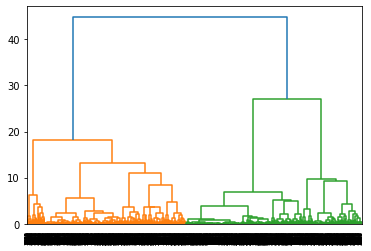

In [208]:
dendrogram = sch.dendrogram(sch.linkage(data_scaled,method='ward'))

In [ ]:
df_0 = df[hc.labels_==0]

In [ ]:
df_1 = df[hc.labels_==1]

In [252]:
df_0.to_csv('between_value_low.csv')

In [253]:
df_1.to_csv('between_value_high.csv')

In [146]:
silhouette_score(data_scaled,membership)

0.45322196268436815

In [147]:
df.loc[:,"Category"]=0
df.loc[hc.labels_==1, "Category"] = 1

In [148]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from statsmodels.regression.linear_model import OLSResults

In [214]:
feature_names = ['Score','AnswerCount','ViewCount','CommentCount','FavoriteCount','Words_in_Title_Description','title_tag_ratio','Auth_reputation','Accepted_Ans','Creation_Days','Last_Activity_Days','Last_Edit_Days','Closed_Days']
nrm_feature_names = [f"Nrm_{i}" for i in feature_names]

In [215]:
scaler = MinMaxScaler()
features = df[feature_names]
nrm_feature_names = [f"Nrm_{i}" for i in feature_names]
scaler.fit(features)
for i in nrm_feature_names:
    df[i] = 0
df[nrm_feature_names] = scaler.transform(features)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(df[nrm_feature_names], df["Category"], test_size=0.3, random_state=62)

In [217]:
lm_cluster_value = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.554092
         Iterations 11


In [218]:
print(lm_cluster_value.summary())

                           Logit Regression Results                           
Dep. Variable:               Category   No. Observations:                 3407
Model:                          Logit   Df Residuals:                     3394
Method:                           MLE   Df Model:                           12
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.1998
Time:                        12:51:42   Log-Likelihood:                -1887.8
converged:                       True   LL-Null:                       -2359.3
Covariance Type:            nonrobust   LLR p-value:                3.440e-194
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Nrm_Score                        505.2866     68.875      7.336      0.000     370.295     640.279
Nrm_AnswerCount                   -2.7516      2.653     -1.037      0.

In [200]:
y_pred = [1 if i else 0 for i in lm_cluster_value.predict(X_test)>0.5]

In [201]:
data_summary = {}

Confusion Matrix: 
[[514 271]
 [156 520]]
Accuracy: 0.7077344284736482
Precision: 0.6573957016434893
Recall: 0.7692307692307693


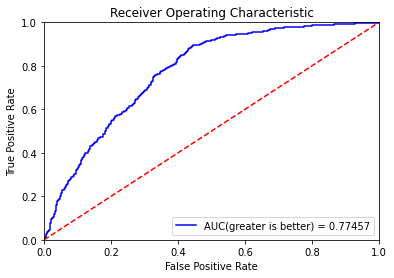

In [202]:
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
fpr, tpr, thresholds = roc_curve(y_test, lm_cluster_value.predict(X_test), pos_label=1)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC(greater is better) = {round(roc_auc, 5)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

data_summary["Exetrems_Model_Testing_Dataset"] = {}
data_summary["Exetrems_Model_Testing_Dataset"]["Accuracy"] = accuracy_score(y_test, y_pred)
data_summary["Exetrems_Model_Testing_Dataset"]["Precision"] = precision_score(y_test, y_pred)
data_summary["Exetrems_Model_Testing_Dataset"]["Recall"] = recall_score(y_test, y_pred)
data_summary["Exetrems_Model_Testing_Dataset"]["AUC"] = auc(fpr, tpr)

Confusion Matrix: 
[[1201  565]
 [ 403 1238]]
Accuracy: 0.7158790724977987
Precision: 0.6866333887964503
Recall: 0.7544180377818404


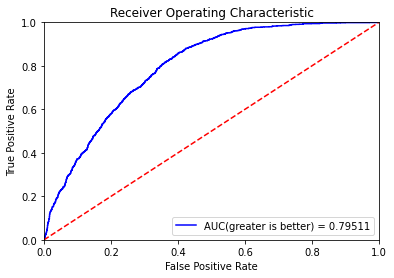

In [203]:
y_pred = [1 if i else 0 for i in lm_cluster_value.predict(X_train)>0.5]
print(f"Confusion Matrix: \n{confusion_matrix(y_train, y_pred)}")
print(f"Accuracy: {accuracy_score(y_train, y_pred)}")
print(f"Precision: {precision_score(y_train, y_pred)}")
print(f"Recall: {recall_score(y_train, y_pred)}")
fpr, tpr, thresholds = roc_curve(y_train, lm_cluster_value.predict(X_train), pos_label=1)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC(greater is better) = {round(roc_auc, 5)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

data_summary["Exetrems_Model_Training_Dataset"] = {}
data_summary["Exetrems_Model_Training_Dataset"]["Accuracy"] = accuracy_score(y_train, y_pred)
data_summary["Exetrems_Model_Training_Dataset"]["Precision"] = precision_score(y_train, y_pred)
data_summary["Exetrems_Model_Training_Dataset"]["Recall"] = recall_score(y_train, y_train)
data_summary["Exetrems_Model_Training_Dataset"]["AUC"] = auc(fpr, tpr)

In [164]:
df_python = pd.read_csv('pythons.csv')

In [166]:
df_python.drop(['Unnamed: 0', 'Ans_Score', 'Editor_reputation', 'Tags_Count','Words_in_Title','title_tag_ratio'], axis=1, inplace=True)

Confusion Matrix: 
[[5247 4745]
 [5434 4574]]
Accuracy: 0.49105
Precision: 0.4908251958364631
Recall: 0.4570343725019984


c:\users\abim\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\users\abim\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


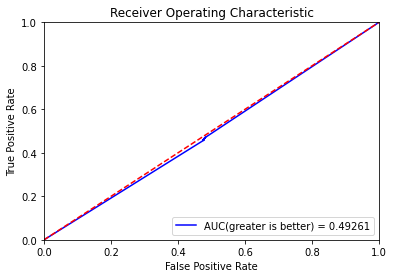

In [167]:
X_train, y_train = df_python[feature_names], df_python["Category"]
y_pred = [1 if i else 0 for i in lm_cluster_value.predict(X_train)>0.5]
print(f"Confusion Matrix: \n{confusion_matrix(y_train, y_pred)}")
print(f"Accuracy: {accuracy_score(y_train, y_pred)}")
print(f"Precision: {precision_score(y_train, y_pred)}")
print(f"Recall: {recall_score(y_train, y_pred)}")
fpr, tpr, thresholds = roc_curve(y_train, lm_cluster_value.predict(X_train), pos_label=1)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC(greater is better) = {round(roc_auc, 5)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


data_summary["Exetrems_Model_Python_Dataset"] = {}
data_summary["Exetrems_Model_Python_Dataset"]["Accuracy"] = accuracy_score(y_train, y_pred)
data_summary["Exetrems_Model_Python_Dataset"]["Precision"] = precision_score(y_train, y_pred)
data_summary["Exetrems_Model_Python_Dataset"]["Recall"] = recall_score(y_train, y_pred)
data_summary["Exetrems_Model_Python_Dataset"]["AUC"] = auc(fpr, tpr)